### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import math

pd.set_option('display.max_rows', None, 'display.max_columns', None)

### Integração e Pré-Processamento

In [ ]:
# Carrega a base de dados ".csv"
df = pd.read_csv("data/microdados_2023_tratado.csv", sep=';', decimal=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259755 entries, 0 to 259754
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   situacao         259755 non-null  object 
 1   Cor / Raça       259755 non-null  object 
 2   eixo_tec         259755 non-null  object 
 3   faixa_etaria     259755 non-null  object 
 4   esforco          259755 non-null  float64
 5   financiamento    259755 non-null  object 
 6   modalidade       259755 non-null  object 
 7   curso            259755 non-null  object 
 8   renda_familiar   259755 non-null  object 
 9   Sexo             259755 non-null  object 
 10  subeixo_tec      254818 non-null  object 
 11  tipo_curso       259755 non-null  object 
 12  tipo_oferta      259755 non-null  object 
 13  turno            259755 non-null  object 
 14  uf               259755 non-null  object 
 15  unidade          259755 non-null  object 
 16  vagas_regulares  259755 non-null  floa

Contagem de cada classe:
situacao
Evadidos       117559
Concluintes     99497
Em Curso        42699
Name: count, dtype: int64

Percentual de cada classe:
situacao
Evadidos       45.257647
Concluintes    38.304171
Em Curso       16.438182
Name: proportion, dtype: float64


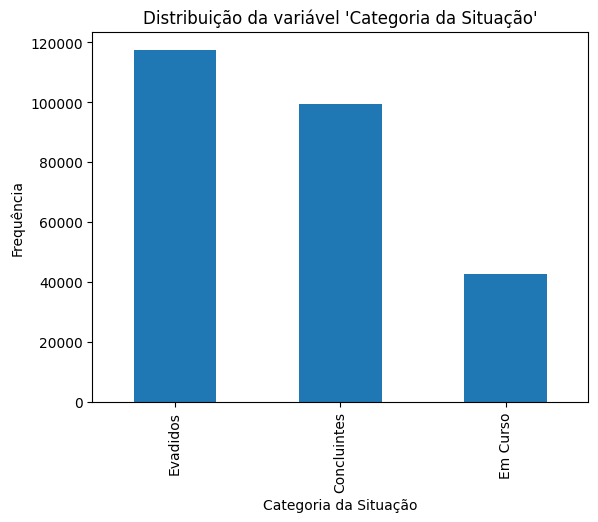

In [4]:
# Verifica a distribuição da variável de previsão
print("Contagem de cada classe:")
print(df['situacao'].value_counts())

print("\nPercentual de cada classe:")
print(df['situacao'].value_counts(normalize=True) * 100)

# plot para visualizar a distribuição
df['situacao'].value_counts().plot(kind='bar')
plt.title("Distribuição da variável 'Categoria da Situação'")
plt.xlabel("Categoria da Situação")
plt.ylabel("Frequência")
plt.show()

In [5]:
# Verifica a quantidade de dados ausentes em cada coluna
missing_data = df.isnull().sum()
print("Dados ausentes por coluna:")
print(missing_data)

# mostra o percentual de dados ausentes em cada coluna
percent_missing = (df.isnull().sum() / len(df)) * 100
print("\nPercentual de dados ausentes por coluna:")
print(percent_missing)



Dados ausentes por coluna:
situacao              0
Cor / Raça            0
eixo_tec              0
faixa_etaria          0
esforco               0
financiamento         0
modalidade            0
curso                 0
renda_familiar        0
Sexo                  0
subeixo_tec        4937
tipo_curso            0
tipo_oferta           0
turno                 0
uf                    0
unidade               0
vagas_regulares       0
duracao_curso         0
municipio           725
rap                 725
taxa_ocup          1494
servidores          725
itcd                725
hier_urbana         725
pib_percap          725
dtype: int64

Percentual de dados ausentes por coluna:
situacao           0.000000
Cor / Raça         0.000000
eixo_tec           0.000000
faixa_etaria       0.000000
esforco            0.000000
financiamento      0.000000
modalidade         0.000000
curso              0.000000
renda_familiar     0.000000
Sexo               0.000000
subeixo_tec        1.900637
tipo_curso

In [6]:
print(df.rap.isnull().sum())
print(df.rap.str.contains(",").sum())
print(df.rap.str.contains(".").sum())

725
0
259030


In [7]:
# Tratamento de dados ausentes
df['rap'] = df.rap[df['rap']!= "(Em branco)"]
df['rap'] = df.rap[df['rap']!= "()"]
df = df[df['rap'].notna()]
# Substitua strings vazias por NaN
df['rap'] = df['rap'].replace('', pd.NA)
# Converter para float
df['rap'] = df['rap'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255777 entries, 0 to 259754
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   situacao         255777 non-null  object 
 1   Cor / Raça       255777 non-null  object 
 2   eixo_tec         255777 non-null  object 
 3   faixa_etaria     255777 non-null  object 
 4   esforco          255777 non-null  float64
 5   financiamento    255777 non-null  object 
 6   modalidade       255777 non-null  object 
 7   curso            255777 non-null  object 
 8   renda_familiar   255777 non-null  object 
 9   Sexo             255777 non-null  object 
 10  subeixo_tec      250840 non-null  object 
 11  tipo_curso       255777 non-null  object 
 12  tipo_oferta      255777 non-null  object 
 13  turno            255777 non-null  object 
 14  uf               255777 non-null  object 
 15  unidade          255777 non-null  object 
 16  vagas_regulares  255777 non-null  float64
 

In [9]:
# Selecionar apenas as colunas do tipo 'object'
df_object = df.select_dtypes(include=['object'])

# Contar os itens únicos em cada coluna do DataFrame resultante
contagem_unicos_object = df_object.nunique()

# Imprimir o resultado
print(contagem_unicos_object)

situacao            3
Cor / Raça          6
eixo_tec           14
faixa_etaria       12
financiamento       6
modalidade          2
curso             320
renda_familiar      7
Sexo                3
subeixo_tec        46
tipo_curso         13
tipo_oferta         7
turno               5
uf                 27
unidade           627
municipio         555
hier_urbana         5
dtype: int64


In [10]:
#Mapas
map_situacao_matricula = {'Concluintes': 0, 'Em Curso': 0, 'Evadidos': 1}

map_faixa_etaria = {'Menor de 14 anos':1,'15 a 19 anos':2,'20 a 24 anos':3, '25 a 29 anos':4,
        '30 a 34 anos':5,'35 a 39 anos':6,'40 a 44 anos':7,'45 a 49 anos':8,
        '50 a 54 anos':9, 'Maior de 60 anos':10,'55 a 59 anos':11, 'S/I':0}


df['situacao'] = df['situacao'].map(map_situacao_matricula)
df['faixa_etaria'] = df['faixa_etaria'].map(map_faixa_etaria)


In [11]:
# LabelEncoder para as colunas do tipo objeto
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
objList = df.select_dtypes(include = "object").columns

for feat in objList:
    df[feat] = lb.fit_transform(df[feat].astype(str))

In [12]:
# Data pré-processado e pronto para análise

print("Dados após o pré-processamento:")
print(df.head())
print(df.info())

Dados após o pré-processamento:
   situacao  Cor / Raça  eixo_tec  faixa_etaria  esforco  financiamento  \
0         0           4         2             8    1.500              4   
1         1           1         1             6    1.078              4   
2         1           1         2             6    1.239              4   
3         0           4         5             6    1.032              4   
4         0           4         1             7    1.078              4   

   modalidade  curso  renda_familiar  Sexo  subeixo_tec  tipo_curso  \
0           0    172               0     1           13           0   
1           0     51               0     0           26           0   
2           0      8               5     0           11           8   
3           0     88               2     1            6          11   
4           0     51               6     1           26           0   

   tipo_oferta  turno  uf  unidade  vagas_regulares  duracao_curso  municipio  \
0        

## Treino

In [13]:
# Ferramentas de imputação e seleção de atributos
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest

# Modelos de classificação
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Encadeamento de transformações e estimadores
from sklearn.pipeline import Pipeline

# Validação e métricas
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import roc_curve, auc

# Testes estatísticos
from scipy.stats import friedmanchisquare, wilcoxon
import scikit_posthocs as sp


In [14]:
# Define um seed para reprodutibilidade
seed = 42

# Define o scorer como acurácia (poderia usar F1, precision, recall...)
scorer = make_scorer(accuracy_score)     # acurácia


# Estratégia de validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)   # Para avaliação final
gscv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)  # Para grid search

# Dicionário de algoritmos e parâmetros (GridSearchCV)
jobs = -1  # usar todos os núcleos

In [15]:
# Importar os algoritmos de classificação

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Dicionário de algoritmos com GridSearchCV
algorithms = {
    'kNN': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())
        ]),
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring=scorer,
        cv=gscv,
        n_jobs=jobs
    ),
    'tree': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=seed))
        ]),
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv,
        n_jobs=jobs
    ),
    'rf': GridSearchCV( 
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('rf', RandomForestClassifier(random_state=seed))
        ]),
        param_grid={
            'rf__n_estimators': [50, 100, 200],
            'rf__max_depth': [None, 3, 5, 7],
            'rf__min_samples_split': [2, 5, 10],
            'rf__min_samples_leaf': [1, 3, 5],
            'rf__criterion': ['gini', 'entropy']
        },
        scoring=scorer,
        cv=gscv,
        n_jobs=jobs
    ),
        'SGBoost': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('sgb', HistGradientBoostingClassifier(random_state=seed))
        ]),
        param_grid={
            'sgb__max_iter': [100, 200],
            'sgb__learning_rate': [0.1, 0.01],
            'sgb__max_depth': [None, 10]
        },
        scoring=scorer,
        cv=gscv,
        n_jobs=jobs
    ),
    'LightGBM': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('lgbm', LGBMClassifier(objective='binary', random_state=seed))
        ]),
        param_grid={
            'lgbm__n_estimators': [100, 200],
            'lgbm__learning_rate': [0.1, 0.01],
            'lgbm__max_depth': [10, 20]
        },
        scoring=scorer,
        cv=gscv,
        n_jobs=jobs
    ),
    'MLP': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler()),
            ('mlp', MLPClassifier(random_state=seed, max_iter=200))
        ]),
        param_grid={
            'mlp__hidden_layer_sizes': [(100,), (50, 50)],
            'mlp__activation': ['relu', 'tanh'],
            'mlp__alpha': [0.0001, 0.001]
        },
        scoring=scorer,
        cv=gscv,
        n_jobs=jobs
    )
}

# Treinamento (Validação Cruzada)

In [16]:
# Amostra de 55% dos dados para evitar sobrecarga computacional
df_sample = df.sample(frac=0.55, random_state=42).reset_index(drop=True) 

# Separa as features (X) e o alvo (y)
X = df_sample.drop('situacao', axis=1)
y = df_sample['situacao']

# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=seed)

result = {}
for alg, clf in algorithms.items():
    print(f"\nTreinando e avaliando: {alg}")
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring=scorer, n_jobs=jobs)
    result[alg] = scores
    print(f"Acurácias (cross-val): {scores}")
    print(f"Média: {scores.mean():.4f} | Desvio: {scores.std():.4f}")


Treinando e avaliando: kNN
Acurácias (cross-val): [0.67794522 0.67320633 0.68344233 0.67567055 0.67396455 0.67794522
 0.68021988 0.67582938 0.66995261 0.67838863]
Média: 0.6767 | Desvio: 0.0036

Treinando e avaliando: tree
Acurácias (cross-val): [0.66505544 0.66278078 0.66410767 0.664392   0.66173822 0.66638233
 0.65785234 0.66635071 0.66625592 0.66625592]
Média: 0.6641 | Desvio: 0.0026

Treinando e avaliando: rf
Acurácias (cross-val): [0.70580988 0.6988911  0.71073832 0.70097621 0.69993366 0.70391432
 0.70192399 0.70255924 0.69981043 0.70464455]
Média: 0.7029 | Desvio: 0.0034

Treinando e avaliando: SGBoost
Acurácias (cross-val): [0.70258743 0.69538432 0.70372477 0.69557388 0.69443655 0.69964932
 0.70249265 0.69194313 0.69450237 0.70265403]
Média: 0.6983 | Desvio: 0.0041

Treinando e avaliando: LightGBM
Acurácias (cross-val): [0.7005971  0.69784855 0.70192399 0.69358355 0.69822766 0.70002843
 0.6980381  0.69488152 0.69507109 0.70170616]
Média: 0.6982 | Desvio: 0.0028

Treinando e ava

In [17]:
# Converte resultados um para DataFrame
result_df = pd.DataFrame.from_dict(result)
print("\nResultados de cross_val_score:")
print(result_df)



Resultados de cross_val_score:
        kNN      tree        rf   SGBoost  LightGBM       MLP
0  0.677945  0.665055  0.705810  0.702587  0.700597  0.670268
1  0.673206  0.662781  0.698891  0.695384  0.697849  0.673112
2  0.683442  0.664108  0.710738  0.703725  0.701924  0.678230
3  0.675671  0.664392  0.700976  0.695574  0.693584  0.671216
4  0.673965  0.661738  0.699934  0.694437  0.698228  0.669226
5  0.677945  0.666382  0.703914  0.699649  0.700028  0.666761
6  0.680220  0.657852  0.701924  0.702493  0.698038  0.671311
7  0.675829  0.666351  0.702559  0.691943  0.694882  0.674123
8  0.669953  0.666256  0.699810  0.694502  0.695071  0.665213
9  0.678389  0.666256  0.704645  0.702654  0.701706  0.677156


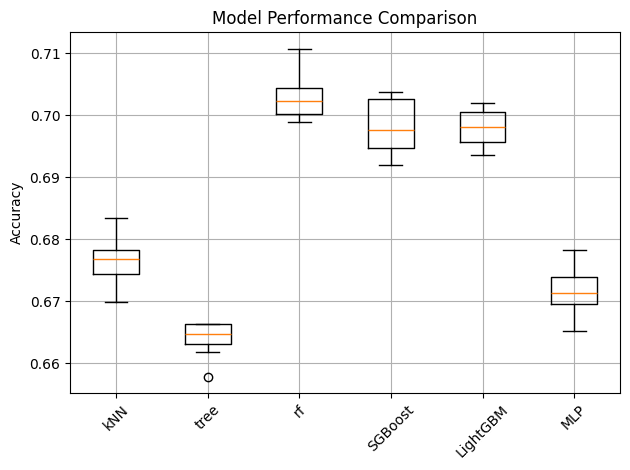

In [24]:
boxplot_data = [result_df[alg].dropna().values for alg in result_df.columns]

plt.boxplot(boxplot_data)
plt.xticks(np.arange(1, len(result_df.columns) + 1), result_df.columns, rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot dos resultados
#plt.boxplot([scores for alg, scores in result_df.items()])
#plt.xticks(np.arange(1, result_df.shape[1] + 1), result_df.columns, rotation=45)
#plt.ylabel("Acurácia")
#plt.title("Comparação de Desempenho dos Modelos")
#plt.show()

In [26]:
# Mostra média ± desvio
formatted_results = result_df.apply(lambda x: "{:.3f} ± {:.3f}".format(x.mean(), x.std()))
print("\nResultados (acurácia) com média ± desvio:")
print(formatted_results)


Resultados (acurácia) com média ± desvio:
kNN         0.677 ± 0.004
tree        0.664 ± 0.003
rf          0.703 ± 0.004
SGBoost     0.698 ± 0.004
LightGBM    0.698 ± 0.003
MLP         0.672 ± 0.004
dtype: object


In [43]:
# Exemplo de teste de Wilcoxon entre dois modelos
stat, p_value = wilcoxon(result_df['tree'], result_df['rf'])
print("\nTeste de Wilcoxon entre kNN e tree:")
print("Estatística = {:.3f}, p-value = {:.3f}".format(stat, p_value))


Teste de Wilcoxon entre kNN e tree:
Estatística = 0.000, p-value = 0.002


In [32]:
# Teste de Friedman
friedman_stat, friedman_p = friedmanchisquare(*[result_df[col] for col in result_df.columns])
print("\nTeste de Friedman:")
print(f"  Estatística = {friedman_stat:.3f}, p-value = {friedman_p:.3f}")



Teste de Friedman:
  Estatística = 47.257, p-value = 0.000


In [33]:
# Teste post-hoc (Nemenyi) após Friedman
nemenyi_results = sp.posthoc_nemenyi_friedman(result_df)
print("\nMatriz de p-valores do Teste de Nemenyi:")
print(nemenyi_results)


Matriz de p-valores do Teste de Nemenyi:
               kNN          tree            rf   SGBoost  LightGBM       MLP
kNN       1.000000  2.059903e-01  6.992196e-03  0.394405  0.470338  0.777005
tree      0.205990  1.000000e+00  1.440794e-07  0.000412  0.000687  0.931561
rf        0.006992  1.440794e-07  1.000000e+00  0.629168  0.549547  0.000026
SGBoost   0.394405  4.123858e-04  6.291683e-01  1.000000  0.999997  0.015816
LightGBM  0.470338  6.869342e-04  5.495474e-01  0.999997  1.000000  0.023199
MLP       0.777005  9.315609e-01  2.574684e-05  0.015816  0.023199  1.000000


In [41]:
# Ranks médios
avg_ranks = result_df.rank(axis=1, ascending=False, method='average').mean().sort_values()
print("\nRanks médios de cada algoritmo:")
print(avg_ranks)


Ranks médios de cada algoritmo:
rf          1.1
SGBoost     2.4
LightGBM    2.5
kNN         4.0
MLP         5.1
tree        5.9
dtype: float64


In [35]:
# Cálculo do Critical Difference (CD)
k = result_df.shape[1]  # número de algoritmos
N = result_df.shape[0]  # número de folds
q_alpha = 2.728         # valor aproximado para alpha=0.05, k=6
cd = q_alpha * math.sqrt(k * (k + 1) / (6 * N))
print(f"\nCritical Difference (CD) = {cd:.3f}")


Critical Difference (CD) = 2.282


In [36]:
# Diagrama de Diferença Crítica simplificado
plt.figure(figsize=(1, 0.3))
algorithms_sorted = avg_ranks.index.tolist()
ranks_sorted = avg_ranks.values
y_rank = 1.0

<Figure size 100x30 with 0 Axes>

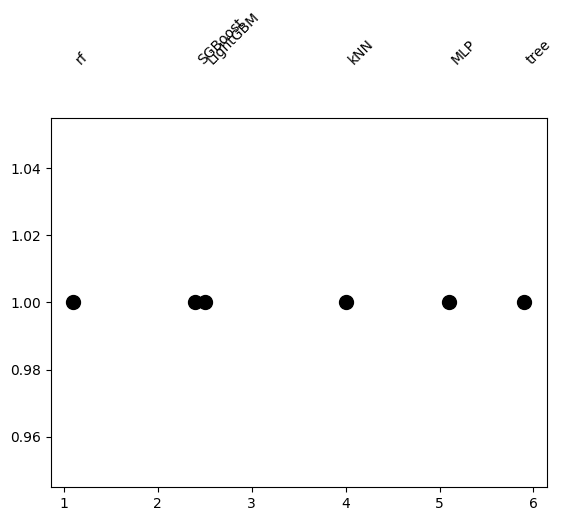

In [37]:
# Pontos
plt.plot(ranks_sorted, [y_rank]*len(ranks_sorted), 'o', markersize=10, color='black')
for i, alg in enumerate(algorithms_sorted):
    plt.text(ranks_sorted[i], y_rank + 0.07, alg, rotation=45, ha='left', va='bottom')

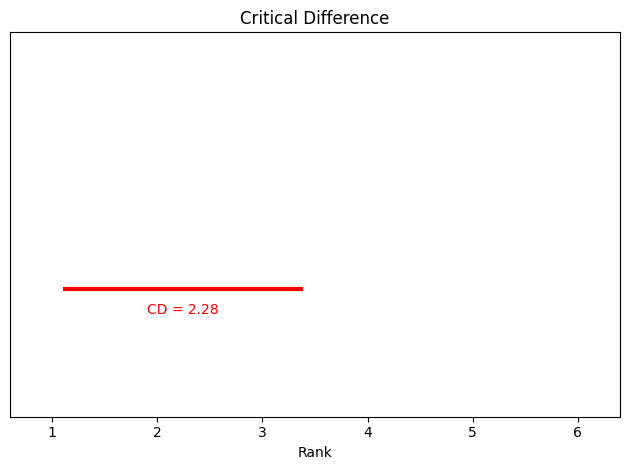

In [44]:
plt.xlabel('Rank')
plt.title('Critical Difference')
y_cd = 0.5
x_start = min(ranks_sorted)
plt.hlines(y_cd, x_start, x_start + cd, colors='red', linewidth=3)
plt.text(x_start + cd/2, y_cd - 0.1, f'CD = {cd:.2f}', color='red', ha='center')
plt.xlim(x_start - 0.5, max(ranks_sorted) + 0.5)
plt.ylim(0, y_rank + 0.5)
plt.yticks([])
plt.tight_layout()
plt.show()

# Curva ROC para cada modelo


Modelo: kNN
Melhor score médio na validação cruzada: 0.6713
Melhores hiperparâmetros encontrados: {'knn__n_neighbors': 5, 'knn__p': 1, 'selector__threshold': 0}

Modelo: tree
Melhor score médio na validação cruzada: 0.6601
Melhores hiperparâmetros encontrados: {'tree__criterion': 'gini', 'tree__max_depth': 10}

Modelo: rf
Melhor score médio na validação cruzada: 0.6990
Melhores hiperparâmetros encontrados: {'rf__criterion': 'gini', 'rf__max_depth': None, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

Modelo: SGBoost
Melhor score médio na validação cruzada: 0.6953
Melhores hiperparâmetros encontrados: {'sgb__learning_rate': 0.1, 'sgb__max_depth': 10, 'sgb__max_iter': 200}
[LightGBM] [Info] Number of positive: 47545, number of negative: 57962
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_

c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_


Modelo: MLP
Melhor score médio na validação cruzada: 0.6678
Melhores hiperparâmetros encontrados: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50, 50)}


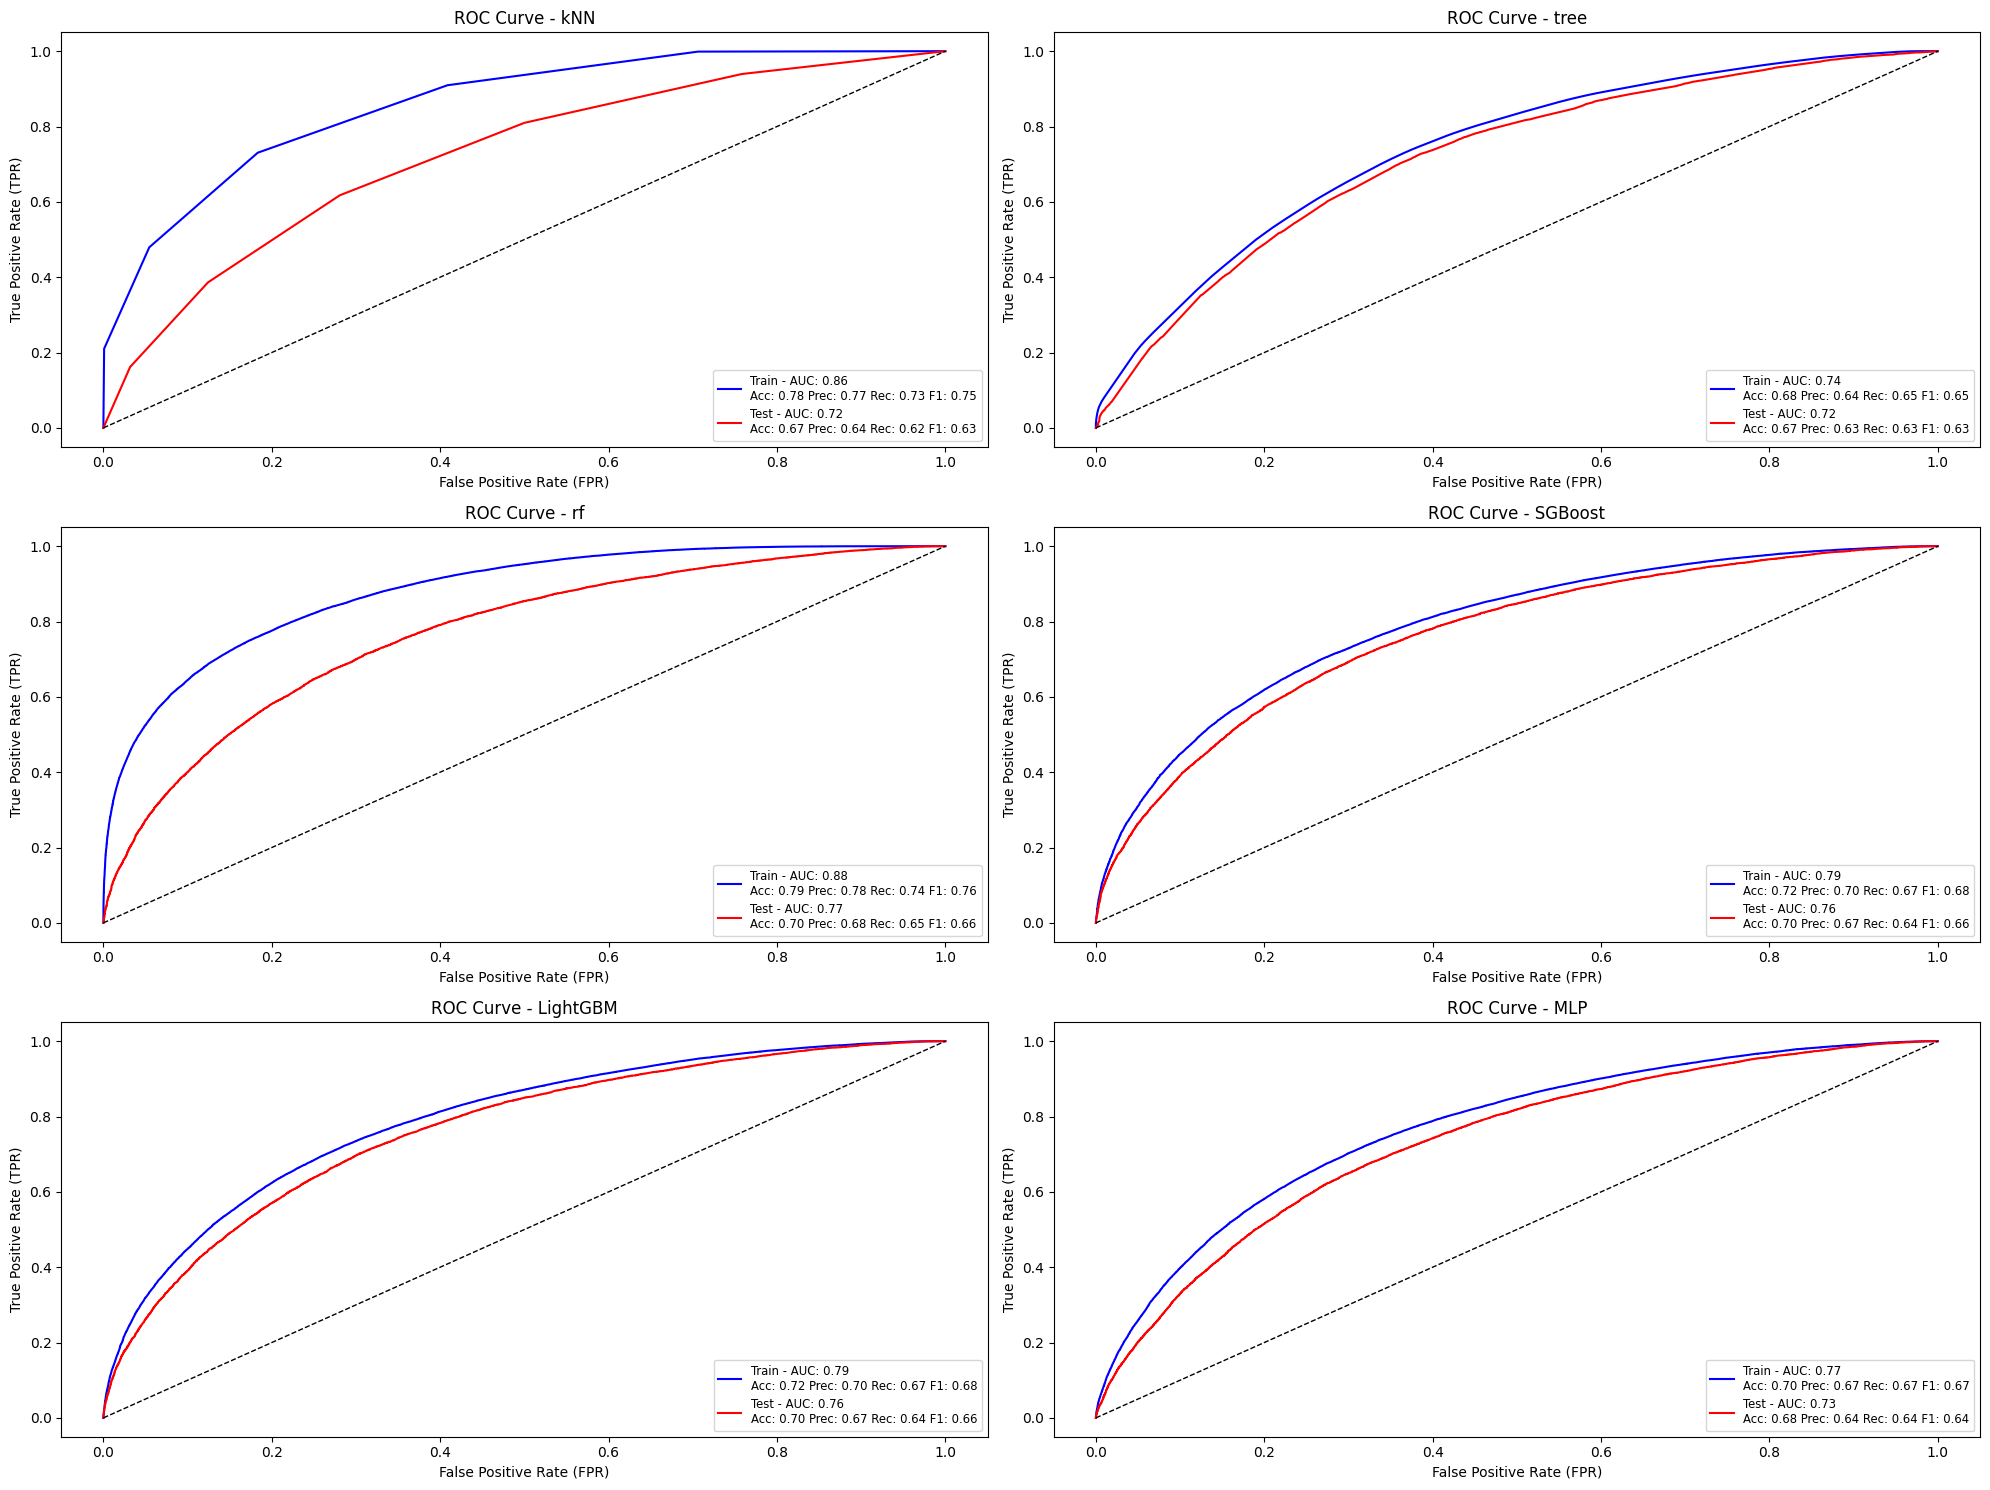

In [20]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import math

# Layout dos subplots: 2 gráficos por linha
n_alg = len(algorithms)
cols = 2
rows = math.ceil(n_alg / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10 * cols, 5 * rows))
axes = axes.flatten()

melhores_modelos = {}
resultados = []

for idx, (alg_name, grid) in enumerate(algorithms.items()):
    # Assume que grid já foi treinado
    grid.fit(X_train, y_train)
    best_clf = grid.best_estimator_
    melhores_modelos[alg_name] = best_clf

    # Extrai e exibe os melhores hiperparâmetros e score de validação cruzada
    melhor_score = grid.best_score_
    melhores_parametros = grid.best_params_
    print(f"\nModelo: {alg_name}")
    print(f"Melhor score médio na validação cruzada: {melhor_score:.4f}")
    print(f"Melhores hiperparâmetros encontrados: {melhores_parametros}")

    ax = axes[idx]

    for split_type, X_split, y_split, color in [("Train", X_train, y_train, "blue"), ("Test", X_test, y_test, "red")]:
        if hasattr(best_clf, "predict_proba"):
            y_scores = best_clf.predict_proba(X_split)[:, 1]
        elif hasattr(best_clf, "decision_function"):
            y_scores = best_clf.decision_function(X_split)
        else:
            print(f"{alg_name} não suporta predição de probabilidades.")
            continue

        fpr, tpr, _ = roc_curve(y_split, y_scores)
        roc_auc = auc(fpr, tpr)

        y_pred = best_clf.predict(X_split)
        acc = accuracy_score(y_split, y_pred)
        prec = precision_score(y_split, y_pred)
        rec = recall_score(y_split, y_pred)
        f1 = f1_score(y_split, y_pred)

        ax.plot(fpr, tpr, color=color, label=(
            f"{split_type} - AUC: {roc_auc:.2f}\n"
            f"Acc: {acc:.2f} Prec: {prec:.2f} Rec: {rec:.2f} F1: {f1:.2f}"))

        resultados.append({
            "Modelo": alg_name,
            "Tipo": split_type,
            "AUC": roc_auc,
            "Acurácia": acc,
            "Precisão": prec,
            "Recall": rec,
            "F1-score": f1,
            "Score Validação Cruzada": melhor_score,
            "Hiperparâmetros": str(melhores_parametros)
        })


    ax.plot([0, 1], [0, 1], "k--", lw=1)
    ax.set_title(f"ROC Curve - {alg_name}")
    ax.set_xlabel("False Positive Rate (FPR)")
    ax.set_ylabel("True Positive Rate (TPR)")
    ax.legend(loc="lower right", fontsize="small")

# Remove subplots extras (se houver)
for i in range(len(algorithms), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()




In [21]:
resultados

[{'Modelo': 'kNN',
  'Tipo': 'Train',
  'AUC': np.float64(0.8588126992184555),
  'Acurácia': 0.777815689954221,
  'Precisão': 0.7657266332987895,
  'Recall': 0.7304238090230308,
  'F1-score': 0.7476587224698056,
  'Score Validação Cruzada': np.float64(0.6713109082809671),
  'Hiperparâmetros': "{'knn__n_neighbors': 5, 'knn__p': 1, 'selector__threshold': 0}"},
 {'Modelo': 'kNN',
  'Tipo': 'Test',
  'AUC': np.float64(0.7231825870341111),
  'Acurácia': 0.6733579755473414,
  'Precisão': 0.6433502070869765,
  'Recall': 0.6174522051864471,
  'F1-score': 0.6301352221506761,
  'Score Validação Cruzada': np.float64(0.6713109082809671),
  'Hiperparâmetros': "{'knn__n_neighbors': 5, 'knn__p': 1, 'selector__threshold': 0}"},
 {'Modelo': 'tree',
  'Tipo': 'Train',
  'AUC': np.float64(0.7420933500300742),
  'Acurácia': 0.6797368894954837,
  'Precisão': 0.6431589683811744,
  'Recall': 0.6498685455883899,
  'F1-score': 0.6464963488376959,
  'Score Validação Cruzada': np.float64(0.6600794260096486),
  '

# Aplicação

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=42)

In [46]:
params = {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


Pipeline_lgbm = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
        ('lgbm', LGBMClassifier(objective='binary', random_state=42, **params, importance_type='split'))
        ])
Pipeline_lgbm.fit(X_train, y_train)


y_train_pred = Pipeline_lgbm.predict(X_train)
y_test_pred = Pipeline_lgbm.predict(X_test)


[LightGBM] [Info] Number of positive: 47545, number of negative: 57962
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2260
[LightGBM] [Info] Number of data points in the train set: 105507, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450634 -> initscore=-0.198111
[LightGBM] [Info] Start training from score -0.198111


c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [47]:
resultado = pd.DataFrame()

resultado.index = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']

resultado['Treinamento'] = [accuracy_score(y_train, y_train_pred),
                            precision_score(y_train, y_train_pred),
                            recall_score(y_train, y_train_pred),
                            f1_score(y_train, y_train_pred)]

resultado['Teste'] = [accuracy_score(y_test, y_test_pred),
                            precision_score(y_test, y_test_pred),
                            recall_score(y_test, y_test_pred),
                            f1_score(y_test, y_test_pred)]

resultado
           

,Treinamento,Teste
Acurácia,0.721260,0.699119
Precisão,0.700460,0.674208
Recall,0.666442,0.643069
F1-Score,0.683028,0.658270


In [48]:
lgbm_model = Pipeline_lgbm['lgbm']

In [49]:
df_feature_importance = pd.DataFrame({ 'feature': X_train.columns,
                                      'Importance':lgbm_model.feature_importances_ }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

df_feature_importance
#df_feature_importance.sort_values(by='feature_importances_', ascending=False, inplace=True)



,feature,Importance
0,duracao_curso,555
1,rap,465
2,taxa_ocup,462
3,curso,446
4,servidores,434
5,unidade,376
6,uf,374
7,vagas_regulares,355
8,renda_familiar,305
9,esforco,300


C:\Users\lucas\AppData\Local\Temp\ipykernel_17672\3285022309.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='feature', data=df_feature_importance_gain, palette='viridis')


Text(0, 0.5, 'Features')

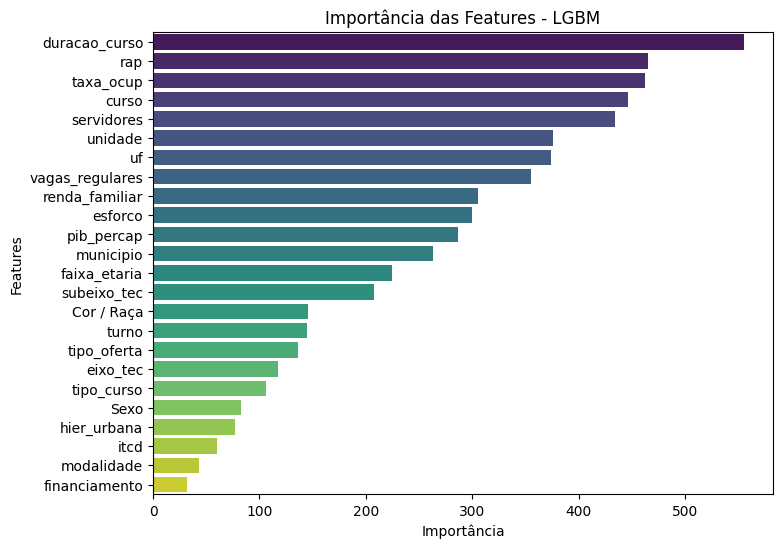

In [50]:
df_feature_importance_gain = df_feature_importance

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='feature', data=df_feature_importance_gain, palette='viridis')
plt.title('Importância das Features - LGBM')
plt.xlabel('Importância')
plt.ylabel('Features')

c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


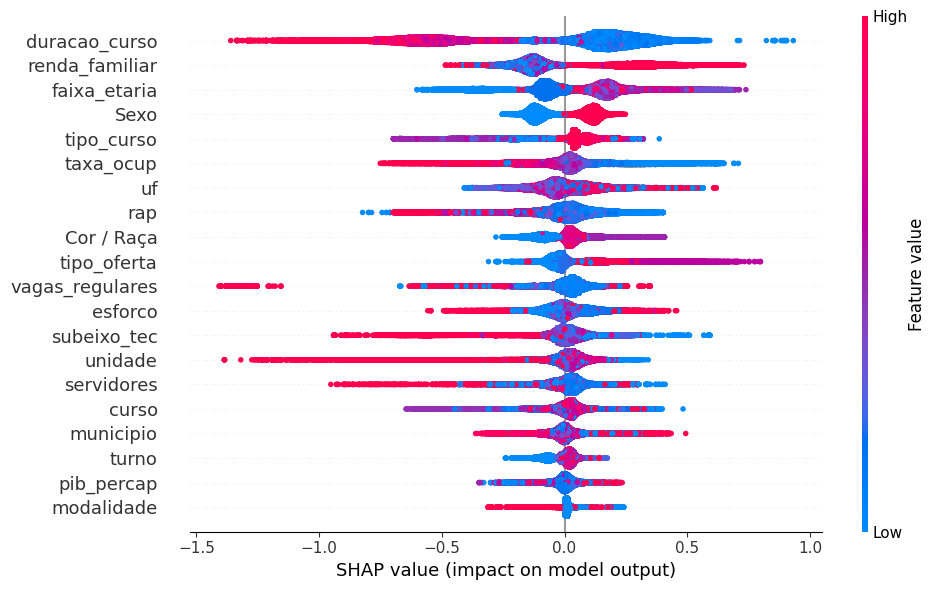

In [51]:
import shap

explainer = shap.TreeExplainer(model=lgbm_model)
shap_values = explainer.shap_values(X_train, y_train)
shap.summary_plot(shap_values, X_train, plot_type="dot", plot_size=(10, 6))


In [52]:
import pickle
# Salva o modelo treinado em um arquivo .pkl
with open('lgbm_model.pkl', 'wb') as f:
    pickle.dump(Pipeline_lgbm, f)
# Carrega o modelo de um arquivo .pkl